# Linear Regression

In machine learning, regression is a quick and simple method for predictive analysis which attempts to predict one dependent variable from a series of other independent variables. For example, house prices depend on many attributes of the house and its location and we can use regression to predict a house price (the dependent variable, $y$) from the given attributes (the independent variables, $x$). 

In [3]:
## Load the python libraries used in this notebook
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex
%matplotlib inline

## Introducing the data

The data we'll use for this example is the well-known Boston Housing Price dataset (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

This is a dataset which can be used to demonstrate regression techniques by providing 14 attributes of a set of Boston houses along with their prices from 1978. The classic task here will is to use these attributes to best predict the house price.

The dataset can be easily loaded using scikit-learn's datasets module and for ease of use, we'll load that into a pandas dataframe.

In [4]:
boston = datasets.load_boston()
features_data = pd.DataFrame(boston.data,columns=boston.feature_names)
features_data['target'] = pd.Series(boston.target)

## Exploratory Analysis

Let's start by plotting each independent variable $x$ against the target $y$ (house price) to see if we can intuitively see and linear relationships.

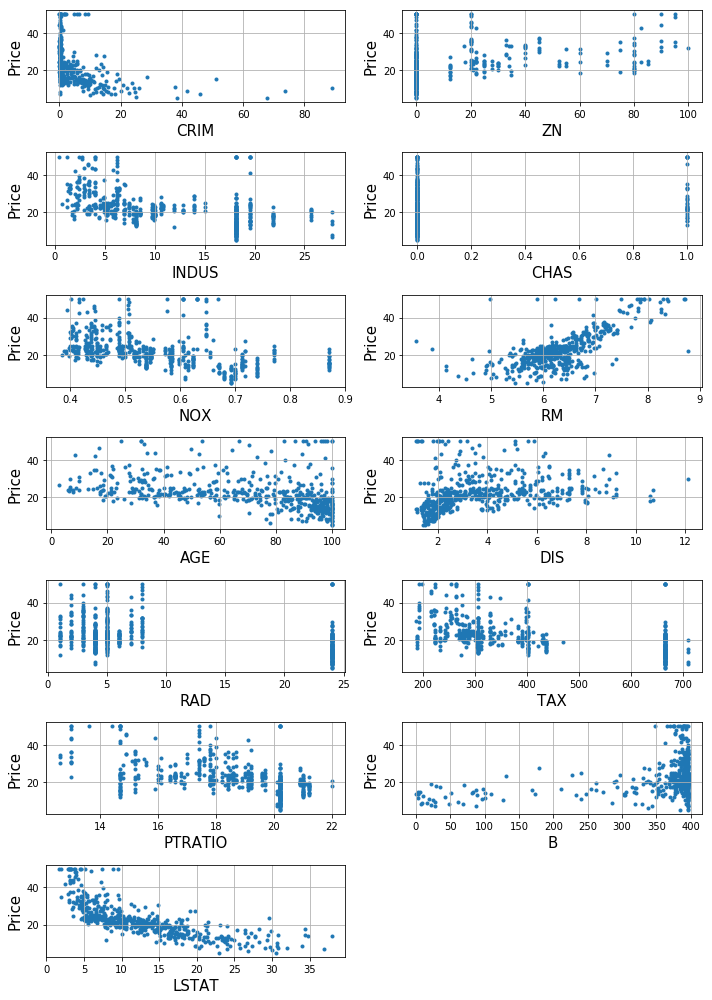

In [5]:
plt.figure(figsize=(10, 14))
for index, feature_name in enumerate(features_data.columns[0:13]):
    plt.subplot(7,2,index+1)
    plt.scatter(features_data[feature_name], features_data['target'], marker='.')
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.grid()
    plt.tight_layout()

Just by looking at these plots, we can see that the 'RM' variable (number of rooms) has a relatively strong positive relationship with the target variable, which we can intuitively understand to indicate that the more rooms a house has, the greater its value. There are obviously other factors involved, but let's use this as a starting point for our analysis.

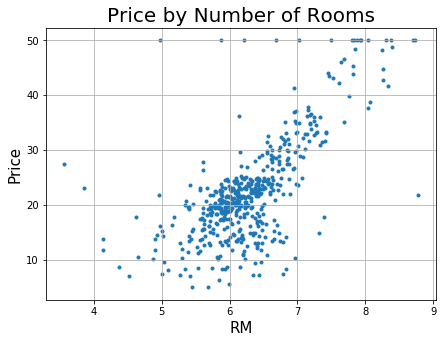

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(features_data['RM'], features_data['target'], marker='.')
plt.ylabel('Price', size=15)
plt.xlabel('RM', size=15)
plt.title("Price by Number of Rooms", size=20)
plt.grid()

To make a prediction of a house price given the number of rooms, we need to find the 'line of best fit' going  through the known data points, i.e. a linear function of the form: 

\begin{align}
h_\theta(x) = \theta_0 +\theta_1 x_1
\end{align}

where $\theta_1$ and $\theta_0$ are the gradient and intercept of the line respectively. The learning aim here is to find the best values for $\theta_0$ and $\theta_1$ which best fits the line on the graph to the data. 

This is generalised to the multivariate case as below.

\begin{align}
h_\theta(x) = \theta_0 +\theta_1 x_1 + \dots + \theta_n x_n
\end{align}

where $n$ is the number of independent variables $x$ and $\theta$ the coefficients of each variable. The learning aim in the general case is to find the optimum values of $\theta$ which fits a plane (of dimension $n$ ) of best fit.

## The Manual Way

To understand the mechanics of the Linear Regression, let's first implement the example manually. We'll later see how we can condense all this into a handful of lines of Python code using the powerful scikit-learn library but let's indulge ourselves in some theory first.

Let's start by fully defining the problem we want to solve. We want to find a function $h_\theta (x)$ which provides a prediction of the house price for each of the examples in our dataset which gives the minimum error compared to the true values of each house price when applied to all values of $x$.

This can be visualised in the below image. We want to find a line $h_{\theta}$ which gives the mimimal distances between each datapoint and the line, i.e. the sum of all the lengths of the broken lines is the least compared to all possible lines.  

<img src="images/image.png">

### The Cost Function

We can calculate this global error using a Cost Function. Many different cost functions are valid but its common to use the Mean Squared Error (MSE) for our cost function as below:

\begin{align}
J(\theta) = \frac{1}{2m}\sum^{m}_{i=1} (h_{\theta}(x_{i})-y_{i})^2
\end{align}

where $m$ is the total number of datapoints we have, $h_{\theta}$ is the prediction of the house price for a given independent variable $x$ and $y$ is the true value of the house price for each example.

The cost function essentially provides us with a measure of global error our hypothesised line is giving us when fitted to the known data. Our learning task is then to find the line $h_{\theta}$ which gives us the minimum value of the cost function, i.e. the minimum global error.

### Minimising the Cost Function - Gradient Descent

In this simple case where we are only considering one independent variable (the house price), we can reasonably expect to solve this analytically but when scaling up to hundreds and sometimes thousands of independent variables and millions of datapointd, analytical methods become much more computationally expensive. Therefore, numerical methods become a much more efficient way to approximate our best fit line. This can be done using an algorithm called Gradient Descent.

Gradient descent is an iterative optimization algorithm, meaning we can start our algorithm with arbitrary values of $\theta$, essentially a guess of our line of best fit $h_{\theta}$ and iteratively improve our estimates for $\theta$.

As a reminder, we are trying to minimise our cost function $J(\theta)$, which is equivalent to finding $J(\theta)$ where it's derivative $\frac{dJ}{d\theta}$ is equal (or close to) to zero, i.e. a local minimum with respect to each $\theta$. Therefore, we need a way to update each coefficient $\theta$ which when calculating the derivative of the new cost function, will take us closer to the local minimum.

The sign of the derivative will give us the direction we need to update $\theta$, for example, if the derivative of $J$ w.r.t. $\theta$ is very negative, it means we have a negative slope and need to increase $\theta$ to move it closer to the local minimum. Similarly if the derivative of $J$ w.r.t. $\theta$ is very positive, it means we have a positive slope and need to decrease $\theta$.

We then just need to assign a learning rate $\alpha$ which which will give us the magnitude of the update to $\theta$. We can choose $\alpha$ to be anything we like but make it too large and we risk constantly overshooting the local minimum, i.e. the algorithm won't converge, or if we make it too small, the algorithm will be very slow to converge. $\alpha = 0.01$ is usually about right. 

These considerations give us the following formulae for updating each $\theta$:

\begin{align}
\theta_{i}= \theta_{i} - \alpha (\frac{\partial J(\theta_{i})}{\partial \theta_{i}})
\end{align}

where:

\begin{align}
\frac{\partial J(\theta_{i})}{\partial \theta_{i}} = \frac{1}{m}\sum^{m}_{j=1} (h(\theta^{(j)}-y^{(j)})\dot X_{i}^{(j)}
\end{align}


We now have all the pieces to define the gradient descent algorithm as follows:

Step 1: Set $\theta$ and learning rate $\alpha$

In our first step, we can just choose $\theta_{1}=0$ and $\theta_{0}=0$.

Step 2: Make predictions on dataset using current $h_{\theta}$.

Step 3: Calculate cost function $J(\theta)$.

Step 4: Calculate partial derivatives of $J(\theta)$ w.r.t. $\theta$ and update $\theta$ with learning rate $\alpha$.

Step 5: Repeat steps 2-4 until convergence.

Let's now write some functions to put this all together and see if we can get this working on our housing dataset example.

In [76]:
def calculate_price(x,theta):
    ## applies the function h to calculate predictions on x
    return(np.dot(x,theta))

def update_thetas(alpha, theta, pred, Y, x):
    ## updates thetas by calculating slopes of partial derivatives of cost function w.r.t. theta and applying learning rate
    theta_updated=[]
    for i in range(x.shape[1]):
        theta_updated.append(theta[i]-alpha*((pred-Y)*x[:,i]).mean())
    
    return(theta_updated)

def calculate_cost_function(x,theta,Y):
    ## Calculates the cost function J(theta): mean squared error.
    pred=calculate_price(x,theta)
    cost=((pred-Y)**2).mean()/2
    return(cost)

def gradient_descent(alpha, iterations, target, features):
    costs=[]
    
    #define feature and target variables
    x=np.column_stack((np.ones(len(features)),features))
    Y=target
    
    #initialise thetas
    theta=np.zeros(x.shape[1])
    
    for i in range(iterations):
    
        #calculate predictions with current thetas
        pred=calculate_price(x,theta)

        #update thetas
        theta=update_thetas(alpha,theta,pred,Y,x)
    
        #calculate new cost
        cost=calculate_cost_function(x,theta,Y)
        costs.append(cost)
        if i%10==0:
            print("Iteration: "+str(i)+", Cost: "+str(cost)+", theta: "+str(theta))
    
    return(costs, cost, theta)

Now, going back to our house prices example, let's run this to see if we can train our model on the data using the house price as the target variable and room number as the independent feature variable. 

In [77]:
## First set our target and feature variables.
target=features_data['target']
features=features_data[['RM']]

## Then run gradient descent with learning rate 0.01 for 500 iterations to give us our optimum thetas.
costs,cost,theta=gradient_descent(alpha=0.001,iterations=500,target=target, features=features)

Iteration: 0, Cost: 274.6696813096887, theta: [0.022532806324110699, 0.14609501501976288]
Iteration: 10, Cost: 135.64822574267384, theta: [0.20199082536912169, 1.31525857508122]
Iteration: 20, Cost: 75.4384406217658, theta: [0.31864361532224905, 2.0849073417334862]
Iteration: 30, Cost: 49.36116872508864, theta: [0.39396474597148534, 2.5916372268861845]
Iteration: 40, Cost: 38.06633277469999, theta: [0.44208587513692832, 2.9253413740044274]
Iteration: 50, Cost: 33.17361599773725, theta: [0.47230698202848137, 3.1451780487289875]
Iteration: 60, Cost: 31.053590552367034, theta: [0.49074834031145825, 3.2900790344954252]
Iteration: 70, Cost: 30.134389071711983, theta: [0.50143767400828942, 3.3856651595197564]
Iteration: 80, Cost: 29.735252183537195, theta: [0.50702560981383071, 3.4487973734064323]
Iteration: 90, Cost: 29.56135009958905, theta: [0.50925651298438146, 3.4905717898015749]
Iteration: 100, Cost: 29.484995111684338, theta: [0.50927834227789881, 3.5182907102335661]
Iteration: 110, C

Looking at the output above, we can see for each twenty iterations, the value of the cost function decreases as $\theta_{0}$ and $\theta_{1}$ are updated until $J(\theta)$ begins to converge to around 29.4.

By ploting the cost function over each iteration of gradient descent, we can see how it rapidly decreases in the early iterations until is converges to the local minimum.

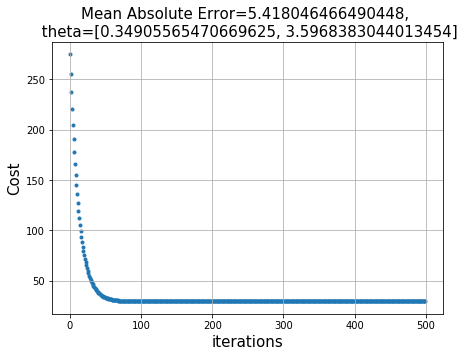

In [34]:
plt.figure(figsize=(7,5))
plt.scatter(x=range(len(costs)),y=costs,marker='.')
plt.grid()
plt.xlabel("iterations",size=15)
plt.ylabel("Cost",size=15)
plt.title("Mean Absolute Error={a}, \n theta={b}".format(a=np.sqrt(cost), b=theta),size=15)
plt.show()

Now we've calculated our optimum thetas, we now have our line of best fit with which we can make predictions.

\begin{align}
h_\theta(x) = 0.349 + 3.597 x_1
\end{align}

In [10]:
def predict(theta0, theta1,x):
    return(theta0+theta1*x)

We still have our $\theta_0$ and $\theta_1$ from our gradient descent so lets pass those into our predict function with and example of $x=4$ (a house with four rooms).

In [11]:
theta

[0.34905565470669625, 3.5968383044013454]

In [12]:
predict(theta[0],theta[1],4)

14.736408872312078

## The Scikit-learn Way

In [63]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [64]:
## First set our target and feature variables in the same way as in our manual example.
target=features_data['target']
features=features_data[['RM']]

In [69]:
## First instantiate a Linear Regression model from sklearn
model=LinearRegression()
## Fit the features and target variable to the model. This is essentially the training step.
model.fit(features, target)
## Test our model by getting predictions on the target variable from the features.
predictions=model.predict(features)
## Get the mean absolute error
mse=mean_squared_error(predictions,target)
rmse=np.sqrt(mse)
rmse

6.6030713892225608

In [78]:
model.coef_

array([ 9.10210898])

In [79]:
model.intercept_

-34.670620776438568